In [229]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')
from sklearn import preprocessing

In [230]:
# Import dataset
#path ='dataset/'
path = '../input/'
df = pd.read_csv('insurance.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
Sex=preprocessing.LabelEncoder()
Smoker=preprocessing.LabelEncoder()
Region=preprocessing.LabelEncoder()
df["Sex"]=Sex.fit_transform(df.iloc[:,1])
df["Smoker"]=Smoker.fit_transform(df.iloc[:,4])
df["Region"]=Region.fit_transform(df.iloc[:,5])
df1=df.drop(columns=["sex","smoker","region"],axis=0)
df1.head()



Number of rows and columns in the data set:  (1338, 7)


age     bmi  children      charges  Sex  Smoker  Region
0   19  27.900         0  16884.92400    0       1       3
1   18  33.770         1   1725.55230    1       0       2
2   28  33.000         3   4449.46200    1       0       2
3   33  22.705         0  21984.47061    1       0       1
4   32  28.880         0   3866.85520    1       0       1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   Sex       1338 non-null   int32  
 8   Smoker    1338 non-null   int32  
 9   Region    1338 non-null   int32  
dtypes: float64(2), int32(3), int64(2), object(3)
memory usage: 89.0+ KB
None


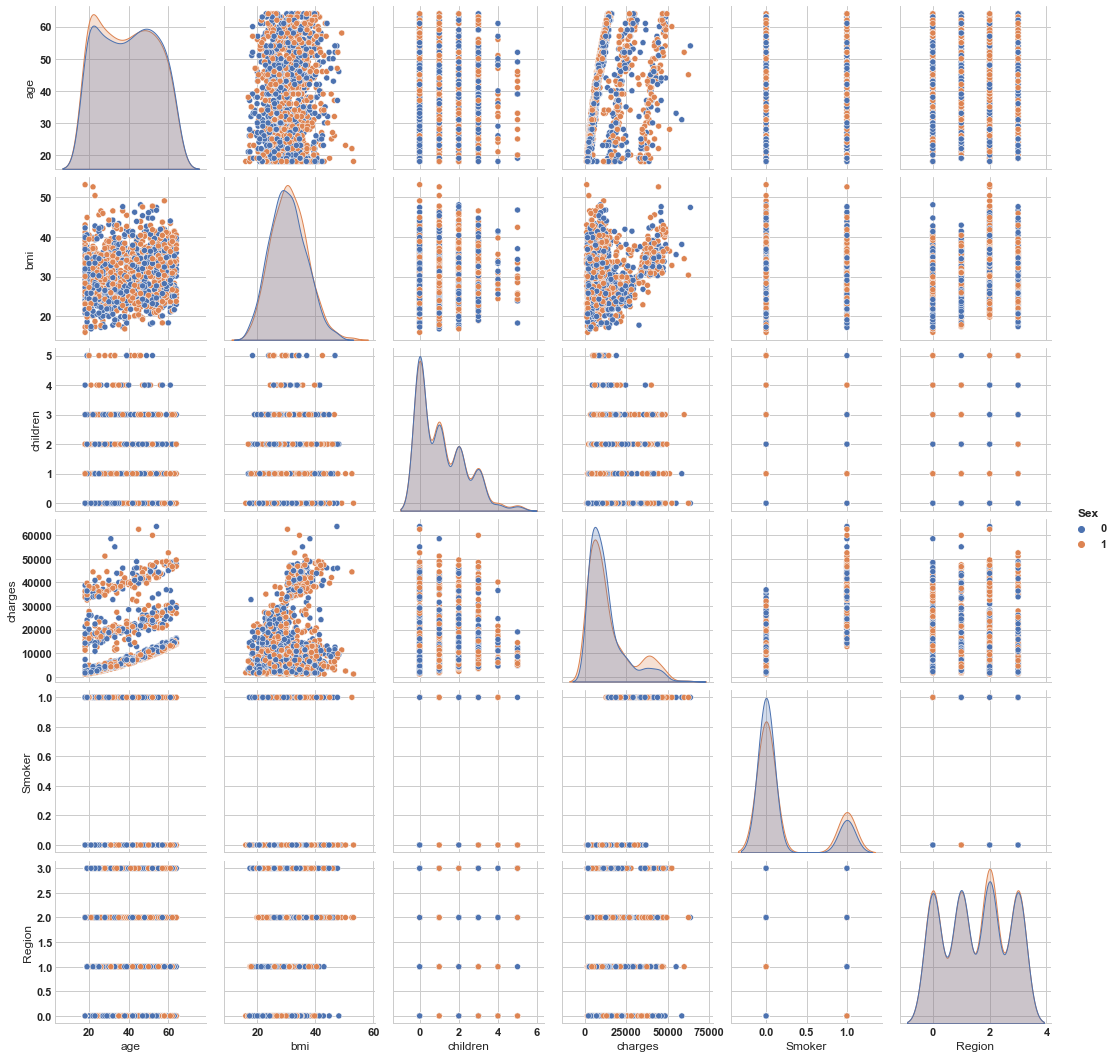

In [231]:
# desribe the dataset (Exploratory data analysis) 
print(df.info())
sns.pairplot(df1,hue="Sex")


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   Sex       1338 non-null   int32  
 8   Smoker    1338 non-null   int32  
 9   Region    1338 non-null   int32  
dtypes: float64(2), int32(3), int64(2), object(3)
memory usage: 89.0+ KB


In [233]:
#Check for missing value
print(df.isna().sum())
df.fillna(df.mean(),inplace=True)
print(df.isna())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
Sex         0
Smoker      0
Region      0
dtype: int64
        age    sex    bmi  children  smoker  region  charges    Sex  Smoker  \
0     False  False  False     False   False   False    False  False   False   
1     False  False  False     False   False   False    False  False   False   
2     False  False  False     False   False   False    False  False   False   
3     False  False  False     False   False   False    False  False   False   
4     False  False  False     False   False   False    False  False   False   
...     ...    ...    ...       ...     ...     ...      ...    ...     ...   
1333  False  False  False     False   False   False    False  False   False   
1334  False  False  False     False   False   False    False  False   False   
1335  False  False  False     False   False   False    False  False   False   
1336  False  False  False     False   False   False    Fa

               age       bmi  children   charges       Sex    Smoker    Region
age       1.000000  0.109272  0.042469  0.299008 -0.020856 -0.025019  0.002127
bmi       0.109272  1.000000  0.012759  0.198341  0.046371  0.003750  0.157566
children  0.042469  0.012759  1.000000  0.067998  0.017163  0.007673  0.016569
charges   0.299008  0.198341  0.067998  1.000000  0.057292  0.787251 -0.006208
Sex      -0.020856  0.046371  0.017163  0.057292  1.000000  0.076185  0.004588
Smoker   -0.025019  0.003750  0.007673  0.787251  0.076185  1.000000 -0.002181
Region    0.002127  0.157566  0.016569 -0.006208  0.004588 -0.002181  1.000000


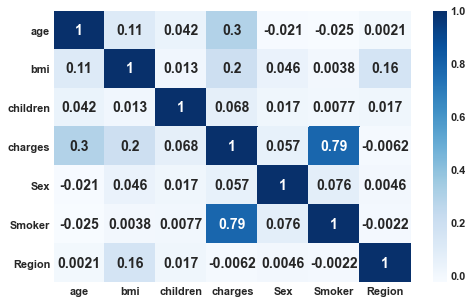

In [234]:
# correlation plot
print(df.corr(method="pearson"))
sns.heatmap(df.corr(),cmap="Blues",annot=True)
plt.show()

      age     bmi  children  Sex  Smoker  Region
0      19  27.900         0    0       1       3
1      18  33.770         1    1       0       2
2      28  33.000         3    1       0       2
3      33  22.705         0    1       0       1
4      32  28.880         0    1       0       1
...   ...     ...       ...  ...     ...     ...
1333   50  30.970         3    1       0       1
1334   18  31.920         0    0       0       0
1335   18  36.850         0    0       0       2
1336   21  25.800         0    0       0       3
1337   61  29.070         0    0       1       1

[1338 rows x 6 columns]


Text(0.5, 1.0, 'Distribution of insurance charges in $log$ sacle')

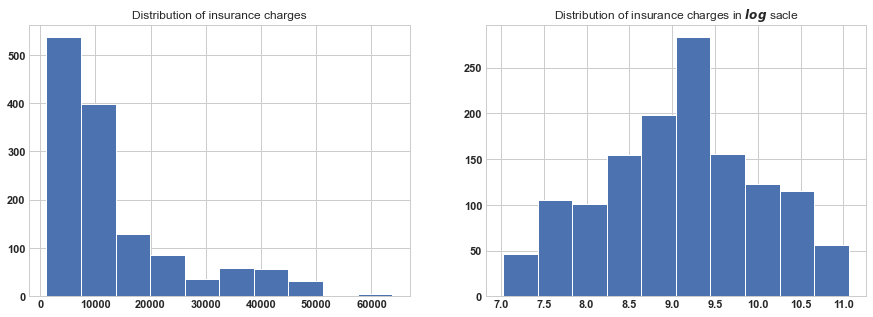

In [235]:
#Plot the distribution of the dependent variable

y=df1.iloc[:,3]
x1=df1.iloc[:,0:3]
x2=df1.iloc[:,4:7]
x=pd.concat([x1,x2],axis=1)
print(x)
f= plt.figure(figsize=(15,5))
ax=f.add_subplot(121)
ax.hist(y)
y1=np.log(y)

ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
ax.hist(y1)
ax.set_title('Distribution of insurance charges in $log$ sacle')

#Convert categorical data into numbers


*   Label Enocding
*   One hot Encoding


#Lable Encoding
Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

#One hot Encoding
A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be 
more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer 
value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

You may take help of pandas get_dummies function for this. 

In [236]:
print(df.dtypes)
Sex=preprocessing.LabelEncoder()
Smoker=preprocessing.LabelEncoder()
Region=preprocessing.LabelEncoder()
df["Sex"]=Sex.fit_transform(df.iloc[:,1])
df["Smoker"]=Smoker.fit_transform(df.iloc[:,4])
df["Region"]=Region.fit_transform(df.iloc[:,5])
df2=df.drop(columns=["sex","smoker","region"],axis=0)
df2.head()

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
Sex           int32
Smoker        int32
Region        int32
dtype: object


age     bmi  children      charges  Sex  Smoker  Region
0   19  27.900         0  16884.92400    0       1       3
1   18  33.770         1   1725.55230    1       0       2
2   28  33.000         3   4449.46200    1       0       2
3   33  22.705         0  21984.47061    1       0       1
4   32  28.880         0   3866.85520    1       0       1

In [237]:
# Log transform of dependent variable
y1=np.log(y)

In [238]:
#Train Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.3, random_state=101)
X_train=np.array(x_train)
X_test=np.array(x_test)
Y_train=np.array(y_train)
Y_test=np.array(y_test)
x_train.head()


age     bmi  children  Sex  Smoker  Region
405   52  38.380         2    0       0       0
835   42  35.970         2    1       0       2
483   51  39.500         1    0       0       3
319   32  37.335         1    1       0       0
956   54  30.800         1    1       1       2

#Model building

theta [ 7.04300454  0.03325052  0.01407749  0.10057153 -0.04105018  1.52389362
 -0.05391283]
Score 0.7892774635828764


Text(0, 0.5, 'Predicted Y')

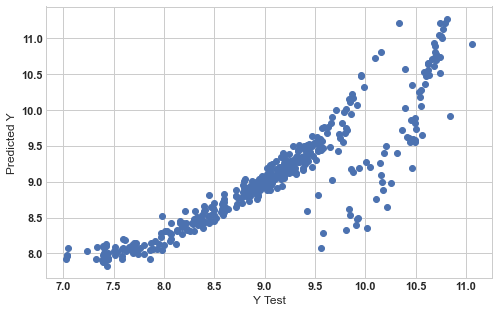

In [239]:
# Step 1: add x0 =1 to dataset
from sklearn.metrics import accuracy_score,classification_report,r2_score
x_bias=np.ones((X_train.shape[0],1))
#print(X_train.shape)
X_train = np.append(x_bias,X_train,axis=1)
#print(X_train)
x_bias = np.ones((X_test.shape[0],1))
X_test = np.append(x_bias,X_test,axis=1)
#X_train



# Step2: build model
x_transpose = np.transpose(X_train)
x_dot_x = x_transpose.dot(X_train)
temp1 = np.linalg.inv(x_dot_x)

temp2 = x_transpose.dot(y_train)
theta = temp1.dot(temp2)
print("theta",theta)
#theta
y_pred1 = np.dot(X_test,theta)
print("Score",r2_score(Y_test,y_pred1))
plt.scatter(y_test,y_pred1)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')



# The parameters for linear regression model

Coefficents [ 0.03325052  0.01407749  0.10057153 -0.04105018  1.52389362 -0.05391283]
Score 0.7892774635828786


Text(0, 0.5, 'Predicted Y')

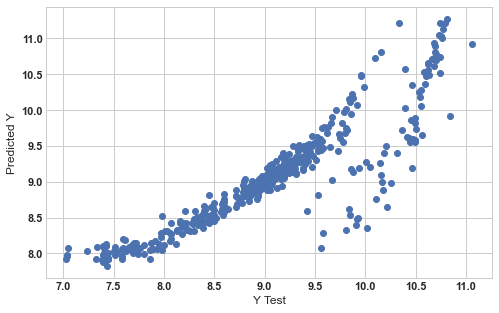

In [240]:
# Scikit Learn module
from sklearn.metrics import accuracy_score,classification_report,r2_score
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
predictions=lm.predict(x_test)
#print(y_test)
print("Coefficents",lm.coef_)
print("Score",r2_score(y_test,predictions))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')





#Parameter

#Model evaluation

In [241]:
# prediction
y_pred =  np.dot(X_test,theta)

#Evaluvation: MSE (Write your MSE equation from scratch)
J_mse = sum((y_pred-Y_test)**2)/y_pred.shape[0]
print(J_mse)


0.17484377359606448


In [242]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)

The Mean Square Error(MSE) or J(theta) is:  0.17484377359606448


In [243]:
# sklearn regression module
y_pred_sk =lm.predict(x_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_test,y_pred_sk)

In [244]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)

The Mean Square Error(MSE) or J(theta) is:  0.17484377359606262


<Figure size 1440x1440 with 0 Axes>

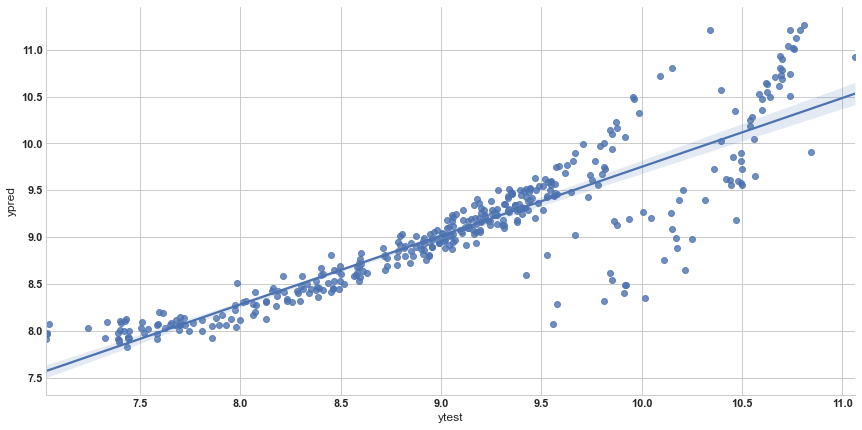

In [245]:
# Check for Linearity
plt.figure(figsize=(20,20))
#sns.set(rc={'figure.figsize':(15,10)})
# ax = f.add_subplot(121)
a1=pd.DataFrame(Y_test,columns=['ytest'])
a2=pd.DataFrame(y_pred,columns=['ypred'])
a3=pd.concat([a1,a2],axis=1)
sns.lmplot(x='ytest',y='ypred',data=a3,height=6,aspect=2)


